In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df = pd.read_csv('Data/DelayedFlights_cleaned.csv')
df.head()

Month  DayofMonth  DayOfWeek  DepTime  CRSDepTime  ArrTime  CRSArrTime  \
0      1          15          2   1948.0        1905   2248.0        2217   
1      1          19          6    916.0         900   1204.0        1143   
2      1          20          7   1403.0        1330   1625.0        1608   
3      1          31          4   1418.0        1350   1810.0        1658   
4      1           2          3   1303.0        1230   1557.0        1445   

  UniqueCarrier  FlightNum TailNum  ...  TaxiIn  TaxiOut  Cancelled  \
0            XE       2597  N12996  ...     9.0     11.0          0   
1            XE       1265  N14998  ...    11.0     18.0          0   
2            XE       1284  N16151  ...     6.0     32.0          0   
3            XE       2217  N29906  ...     5.0     51.0          0   
4            XE       2543  N16919  ...     6.0      8.0          0   

   CarrierDelay  WeatherDelay NASDelay SecurityDelay  LateAircraftDelay  \
0          31.0           0.0      0.0           0.0                0.0   
1          16.0           0.0      5.0           0.0                0.0   
2           0.0           0.0     17.0           0.0                0.0   
3           0.0           9.0     44.0           0.0               19.0   
4           0.0           0.0     72.0           0.0                0.0   

   Delayed        Date  
0     True  2008-01-15  
1     True  2008-01-19  
2     True  2008-01-20  
3     True  2008-01-31  
4     True  2008-01-02  

[5 rows x 28 columns]

In [3]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

## 0. Xem xét về tình trạng delay

**Xem xét tỉ lệ các chuyến bay bị delay**

In [4]:
delay_counts = df['Delayed'].value_counts()
fig = px.pie(values=delay_counts.values, names=delay_counts.index, title='Proportion of Delayed Flights', 
             labels={'index': 'Delayed', 'value': 'Number of Flights'})


fig.show()

**Nhận xét**  
- Có đến hơn 87 % số chuyến bay bị delay.
- Con số cao như vậy là do dataset chỉ ghi nhận các chuyến bay khởi hành trễ hơn lịch, và ta set mốc thời gian không bị delay là ít hơn 15 phút.  

**Xem phân bố của thời gian delay khi khởi hành**

In [5]:
# loại bỏ outlier để ta dễ quan sát hơn
df_no_outliers = remove_outliers(df, 'DepDelay')
px.histogram(df_no_outliers,
             x='DepDelay',
             title='Departure Delay Distribution',
             labels={'DepDelay':'Departure Delay (minutes)'})


**Nhận xét**

- Thời gian delay chủ yếu là ở mức 20p
- Phần lớn rơi vào trong khoảng 20 đến 60 phút. Đây là khoảng thời gian bị delayed tương đối chấp nhận được

## 1. Xu hướng theo thời gian

### a) Xét số lượng chuyến bay theo các thời điểm trong năm

In [6]:
flights_by_date = df.groupby('Date')['Date'].value_counts().sort_index()
px.line(flights_by_date,
        x=flights_by_date.index,
        y=flights_by_date.values,
        title='Number of flights by date in 2008',
        labels={'x':'Date', 'y':'Number of Flights'},)

**Nhận xét**

- Số lượng chuyến bay trong năm có nhiều biến động

- Tuy nhiên, dường như dữ liệu cho thấy có tính chu kỳ

Xét theo các ngày trong tuần

In [7]:
top_by_weekday = df['DayOfWeek'].value_counts().sort_index()
top_by_weekday.index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

px.bar(top_by_weekday,
       x=top_by_weekday.index,
       y=top_by_weekday.values,
       title='Number of Flights by Day of the Week',
       labels={'y':'Number of Flights', 'x':'Day of the Week',})


**Nhận xét**

- Thời gian các chuyến bay diễn ra phân bố tương đối đều nhau giữa các ngày trong tuần

- Thời gian cao điểm thường rơi vào ngày thứ 6

- Lý do T6 khá cao có thể do người ta đi làm ở các thành phố hoặc bang khác, nên ngày T6 (ngày làm cuối cùng) người ta sẽ bay về nhà của mình

- Ngày T2 và ngày CN cũng khá cao, lý do có thể là vì sau khi họ về nhà thì phải trở lại làm việc vào tuần mới nên số chuyến bay có thể tăng lên theo.

Xét theo tháng

In [8]:
top_by_month = df['Month'].value_counts().sort_index()
top_by_month.index=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

px.line(top_by_month,
         x=top_by_month.index,
         y=top_by_month.values,
         title='Number of Flights by Month',
         labels={'x':'Month', 'y':'Number of Flights'},
         markers=True)

**Nhận xét**

- Khi xét theo tháng, dễ dàng thấy được 3 tháng cao điểm rơi vào: T3, T7 và T12. Một vài lí do có thể như: T7 là rơi vào mùa hè nên nhu cầu đi lại và du lịch tăng cao, T12 có diễn ra lễ giáng sinh nên nhu cầu về nhà với gia đình cũng tăng và dây cũng là kì nghỉ khá dài.

- Ngoài các tháng cao điểm, số lượng chuyến bay có xu hướng giảm, thấp nhất vào các tháng: T5, T9

- **Tính chu kỳ**: có thể thấy rằng số lượng chuyến bay thường đạt đỉnh theo chu kỳ khoảng 5 tháng.

    - Ví dụ: một chu kỳ T1-T5

Xét theo giờ

In [9]:
def convert_to_hour(time):
    if pd.isna(time):
        return None
    time = int(time)
    hour = time // 100
    return hour if 0 <= hour < 24 else None


df['DepHour'] = df['DepTime'].apply(convert_to_hour)

/home/binhng/miniconda3/envs/min_ds-env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/home/binhng/miniconda3/envs/min_ds-env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/home/binhng/miniconda3/envs/min_ds-env/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/home/binhng/miniconda3/envs/min_ds-env/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



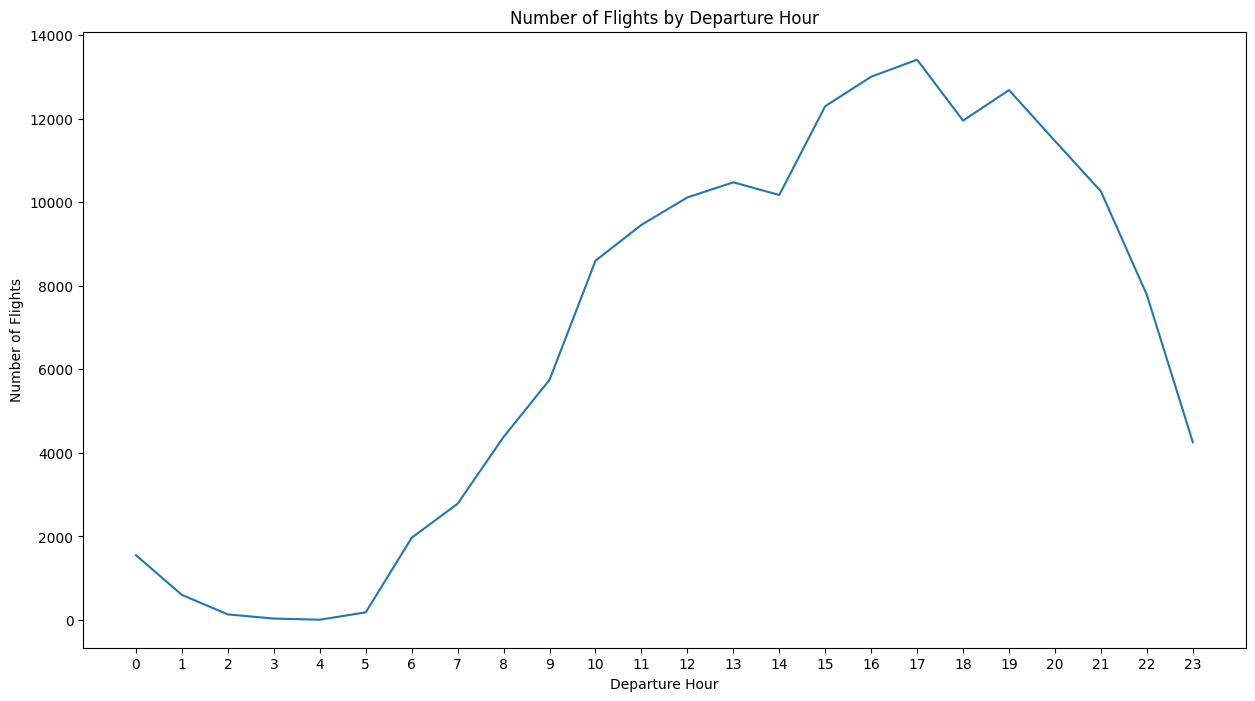

In [10]:
hourly_flight_counts = df['DepHour'].value_counts().sort_index()

plt.figure(figsize=(15, 8))
sns.lineplot(x=hourly_flight_counts.index, y=hourly_flight_counts.values)
plt.title('Number of Flights by Departure Hour')
plt.xlabel('Departure Hour')
plt.ylabel('Number of Flights')
plt.xticks(range(24))  
plt.show()


**Nhận xét:**

- Số lượng chuyến bay tăng dần từ sáng sớm đến đỉnh điểm vào khoảng 10:00 và 11:00.
- Sau 11:00, số lượng chuyến bay giảm dần đến đáy điểm vào khoảng 23:00.
- Có hai đợt cao điểm trong ngày: sáng sớm và buổi chiều tối.

**Giải thích:** 

- Sáng sớm: Đây là khoảng thời gian mà nhiều người đi công tác hoặc du lịch. Các hãng hàng không thường đề xuất các chuyến bay vào sáng sớm để hành khách có thể đến đích kịp thời cho công việc hoặc lịch trình du lịch.
- Buổi chiều tối: Đây là khoảng thời gian mà nhiều người đi du lịch hoặc thăm thân. Các hãng hàng không thường đề xuất các chuyến bay vào buổi chiều tối để hành khách có thể tiết kiệm thời gian di chuyển và nghỉ ngơi tại nơi đến.

### b) Xét số lượng chuyến bay bị delay theo các thời điểm trong năm

In [11]:
delayed_flights_by_date = df['Date'].value_counts().sort_index()

px.line(delayed_flights_by_date,
        x=delayed_flights_by_date.index,
        y=delayed_flights_by_date.values,
        title='Number of Delayed Flights by Date',
        labels={'x':'Date', 'y':'Number of Delayed Flights'})

**Nhận xét**

- Sự biến đổi của dữ liệu tương tự như số lượng chuyến bay

- Dữ liệu cũng cho thấy có tính chu kỳ

- Có nhiều sự biến động trong dữ liệu

Xét theo các ngày trong tuần

In [12]:
delayed_flights = df[df['Delayed'] == 1]
top_by_weekday = delayed_flights['DayOfWeek'].value_counts().sort_index()
top_by_weekday.index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

px.bar(top_by_weekday,
       x=top_by_weekday.index,
       y=top_by_weekday.values,
       title='Number of Delayed Flights by Day of the Week',
       labels={'y':'Number of Flights', 'x':'Day of the Week',})


**Nhận xét**

- Số lượng chuyến bay bị delayed theo ngày trong tuần có xu hướng tương tự với số lượng chuyến bay


Xét số lượng chuyến bay bị delayed theo tháng

In [13]:
delayed_flights = df[df['Delayed'] == 1]

delayed_flights_by_month = delayed_flights['Month'].value_counts().sort_index()
px.line(delayed_flights_by_month,
            x=delayed_flights_by_month.index,
            y=delayed_flights_by_month.values,
            title='Number of Delayed Flights by Month',
            labels={'x':'Month', 'y':'Number of Delayed Flights'},
            markers=True)

**Nhận xét**

- Số lượng chuyến bay bị delayed theo tháng có xu hướng tương tự với số lượng chuyến bay

- **Tính chu kỳ**: tương tự như tính chu kỳ của số lượng chuyến bay. Chu kỳ cũng có kéo dài khoảng 5 tháng. Bởi vì số lượng chuyến bay càng nhiều thì số lượng bị delayed sẽ tăng theo tương ứng.

### 2. Xem xét tương quan

Trực quan hóa mối tương quan giữa ngày trong tuần và tháng với thời gian chậm trễ trung bình

In [14]:
delay_avg = df.groupby(['Month', 'DayOfWeek'])['ArrDelay'].mean().unstack()

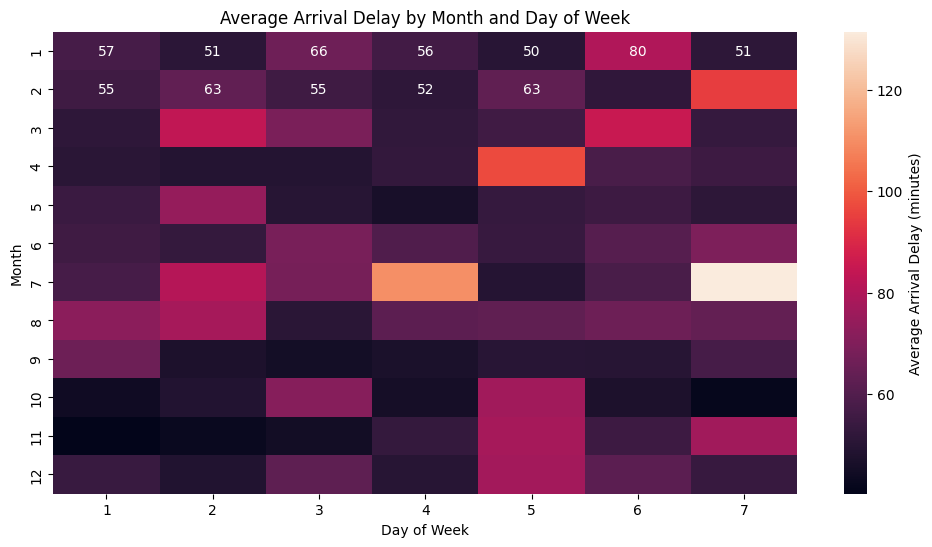

In [15]:
plt.figure(figsize=(12, 6))
sns.heatmap(delay_avg, annot=True,  cbar_kws={'label': 'Average Arrival Delay (minutes)'})
plt.title('Average Arrival Delay by Month and Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Month')
plt.show()

**Nhận xét** 
- Thời gian bị delay trung bình khá tương đồng với số lượng chuyến bay.  

**Giải thích**  
- Số lượng chuyến bay nhiều gây khó khăn trong việc lên lịch và quản lý.
- Có thể do số chuyến bay nhiều, nên khi gặp sự cố phải bị delay dễ ảnh hưởng đến các chuyến bay khác.

Trực quan hóa mối tương quan giữa các loại thời gian chậm trễ

In [16]:
delay_cols = ['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']

correlation_matrix = df[delay_cols].corr()

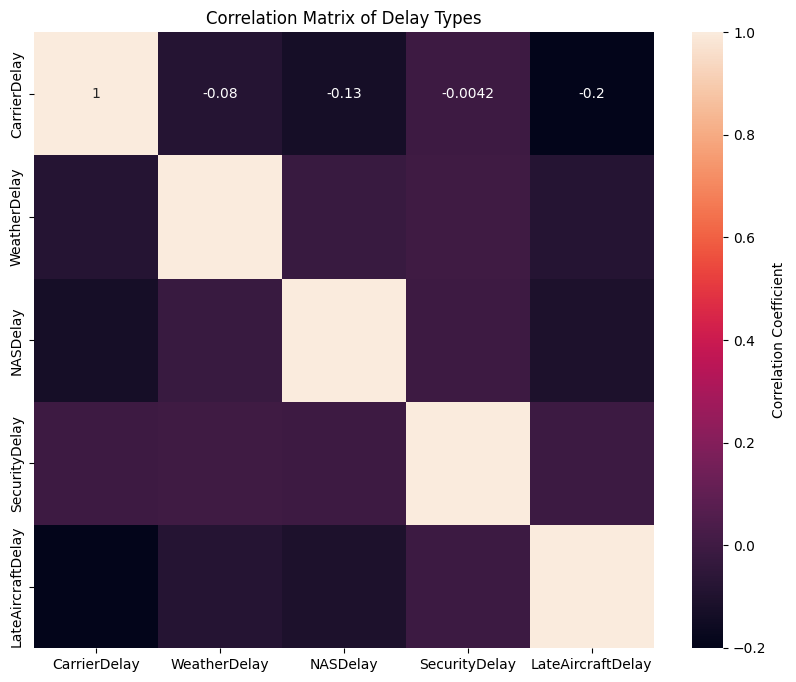

In [17]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation Matrix of Delay Types')
plt.show()

### 3. Phân tích phân bố của dữ liệu

Tìm hiểu về số lượng chuyến bay của các sân bay ở Georgia

In [18]:
top_10_ap = df['Origin'].value_counts().head(10)
px.bar(top_10_ap,
       x=top_10_ap.index,
       y=top_10_ap.values,
       title='Top 10 Airports with most flights',
       labels={'x':'Airport', 'y':'Number of Flights'},)

**Nhận xét**

- Nhìn chung, tại bang `Georgia` sân bay có lưu lượng bay cao nhất là `ATL`

- Số lượng bay tại sân bay này là cao nhất và có sự chênh lệch lớn giữa nó với phần còn lại

In [19]:
df['Dest'].value_counts()

Dest
ATL    71607
LGA     2961
SAV     2806
EWR     2779
ORD     2165
       ...  
ASE        7
MFE        3
FCA        3
CRP        1
GUC        1
Name: count, Length: 173, dtype: int64

Xem xét thời gian chậm trễ theo hãng hàng không

/home/binhng/miniconda3/envs/min_ds-env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/home/binhng/miniconda3/envs/min_ds-env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/home/binhng/miniconda3/envs/min_ds-env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



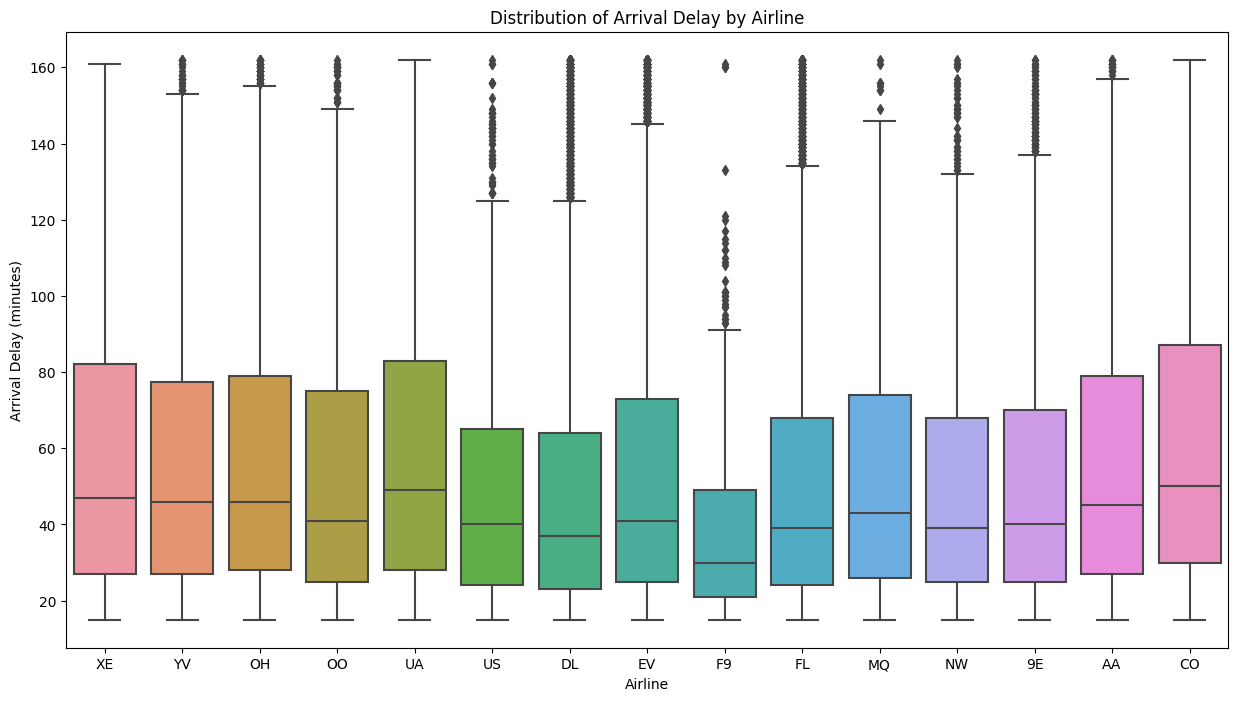

In [20]:
# loại bỏ outlier để ta dễ quan sát hơn
df_no_outliers = remove_outliers(df, 'ArrDelay')

plt.figure(figsize=(15, 8))
sns.boxplot(x='UniqueCarrier', y='ArrDelay', data=df_no_outliers)
plt.title('Distribution of Arrival Delay by Airline')
plt.xlabel('Airline')
plt.ylabel('Arrival Delay (minutes)')
plt.show()

**Nhận xét**  
- Không có sự khác biệt đáng kể giữa các hăng hàng không về thời gian delay

Xem thời gian chậm trễ theo sân bay xuất phát và sân bay đến
- Ta chỉ trực quan top 5 sân bay và top cuối san bay

In [21]:
origin_counts = df['Origin'].value_counts()
dest_counts = df['Dest'].value_counts()

top_5_origins = origin_counts.nlargest(5).index
bottom_5_origins = origin_counts.nsmallest(5).index
top_5_dests = dest_counts.nlargest(5).index
bottom_5_dests = dest_counts.nsmallest(5).index

# Lọc ra dữ liệu của top 5 và bottom 5 sân bay xuất phát và sân bay đến
top_bottom_origins = top_5_origins.union(bottom_5_origins)
top_bottom_dests = top_5_dests.union(bottom_5_dests)

df_top_bottom_origins = df[df['Origin'].isin(top_bottom_origins)]
df_top_bottom_dests = df[df['Dest'].isin(top_bottom_dests)]

In [22]:
# Khử các giá trị ngoại lai để trực quan hóa rõ hơn
df_top_bottom_origins = remove_outliers(df_top_bottom_origins, 'ArrDelay')
df_top_bottom_dests = remove_outliers(df_top_bottom_dests, 'ArrDelay')

/home/binhng/miniconda3/envs/min_ds-env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/home/binhng/miniconda3/envs/min_ds-env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/home/binhng/miniconda3/envs/min_ds-env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



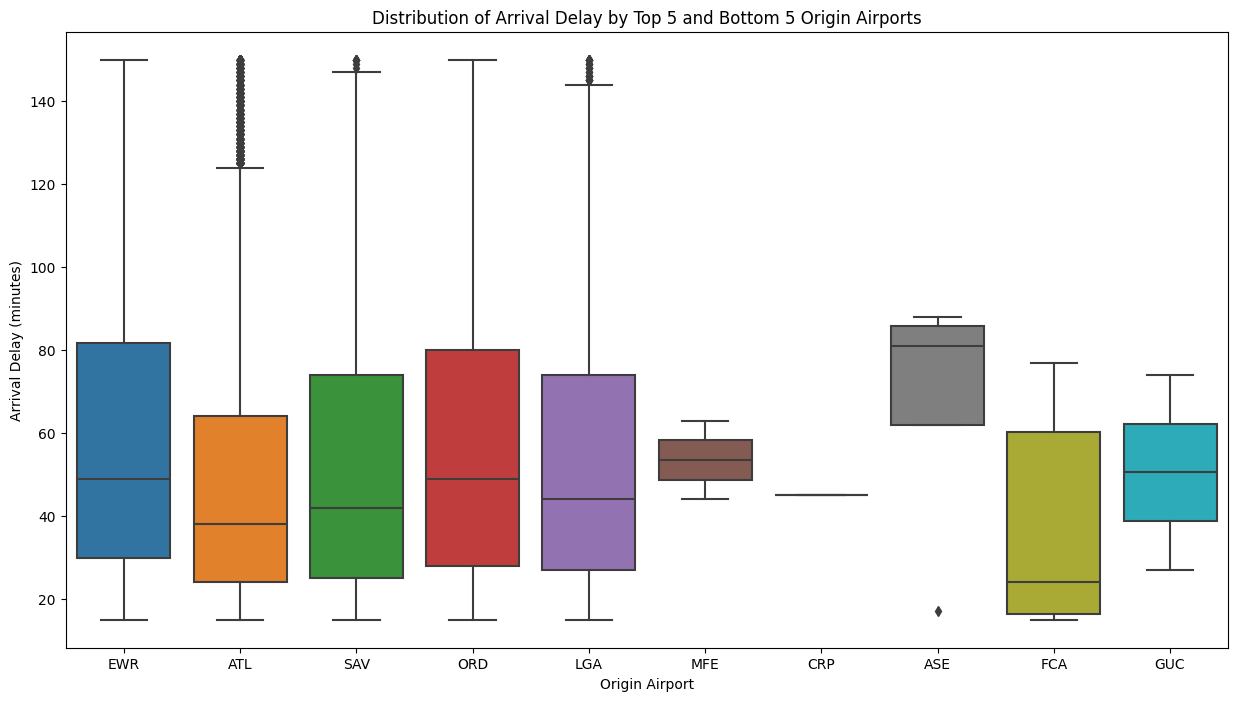

In [23]:
# Vẽ box plot cho thời gian chậm trễ theo sân bay xuất phát
plt.figure(figsize=(15, 8))
sns.boxplot(x='Origin', y='ArrDelay', data=df_top_bottom_origins)
plt.title('Distribution of Arrival Delay by Top 5 and Bottom 5 Origin Airports')
plt.xlabel('Origin Airport')
plt.ylabel('Arrival Delay (minutes)')
plt.show()

# # Vẽ box plot cho thời gian chậm trễ theo sân bay đến
# plt.figure(figsize=(15, 8))
# sns.boxplot(x='Dest', y='ArrDelay', data=df_top_bottom_dests)
# plt.title('Distribution of Arrival Delay by Top 5 and Bottom 5 Destination Airports')
# plt.xlabel('Destination Airport')
# plt.ylabel('Arrival Delay (minutes)')
# plt.xticks(rotation=90)
# plt.show()

**Nhận xét**  
- Ở top 5 sân bay, không có quá nhiều sự khác biệt về thời gian delay
- Ở các sân bay ít chuyến bay nhất, có sự khác biệt về thời gian delay.
- Các sân sân bay ít chuyến bay thường có thời gian delay trung bình cao hơn.  

**Giải thích**  
- Do các sân bay ít chuyến bay, nên họ cũng thiếu kinh nghiệm vận hành, dẫn đến thời gian delay trung bình cao hơn

4. Phân tích nguyên nhân gây delay

Biểu đồ ảnh hưởng của ArrDelay vs DepDelay

/home/binhng/miniconda3/envs/min_ds-env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/home/binhng/miniconda3/envs/min_ds-env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



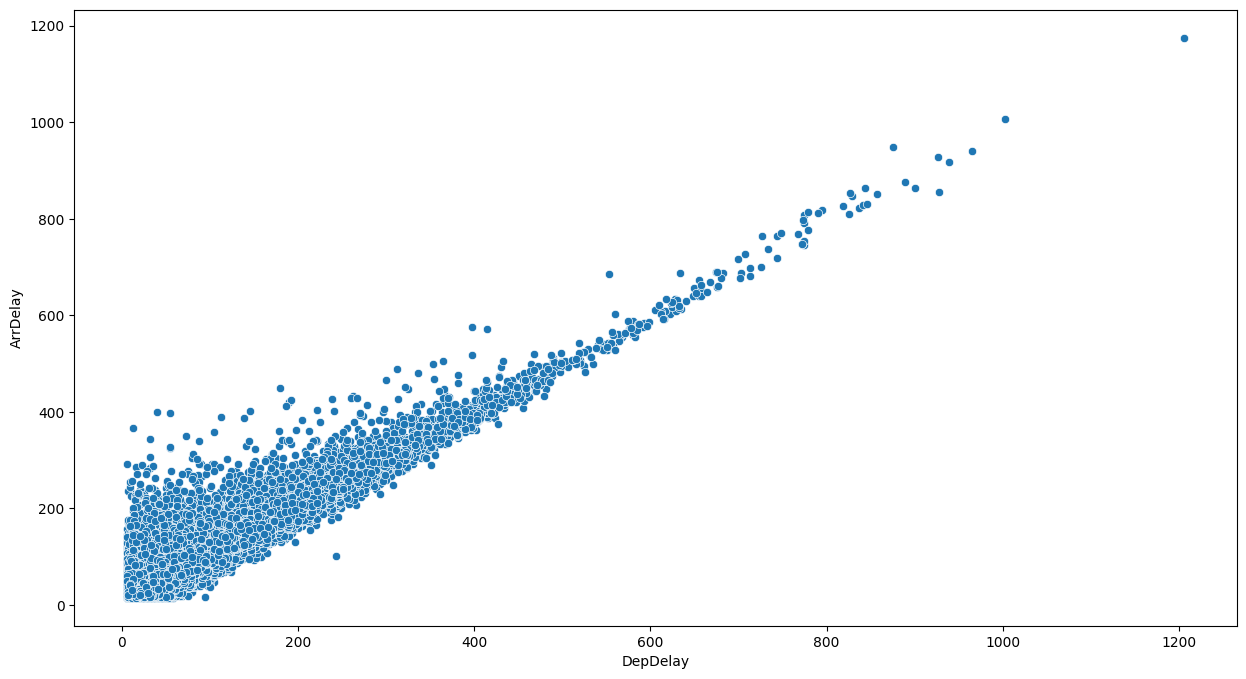

In [32]:
plt.figure(figsize=(15, 8))
sns.scatterplot(x='DepDelay', y='ArrDelay', data=df)
plt.title('')
plt.xlabel('DepDelay')
plt.ylabel('ArrDelay')
plt.show()

**Nhận xét**
- Ta thấy có mối tương quan giữa thời gian chậm trễ khi hạ cánh và thời gian chậm trễ khi cất cánh.
**Giải thích** 
- Điều này khá dễ hiểu, máy bay cất cánh càng trễ thì hạ cánh càng trễ

Biểu đồ ảnh hưởng của khoảng cách (Distance) lên thời gian chậm trễ khi cất cánh

/home/binhng/miniconda3/envs/min_ds-env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/home/binhng/miniconda3/envs/min_ds-env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



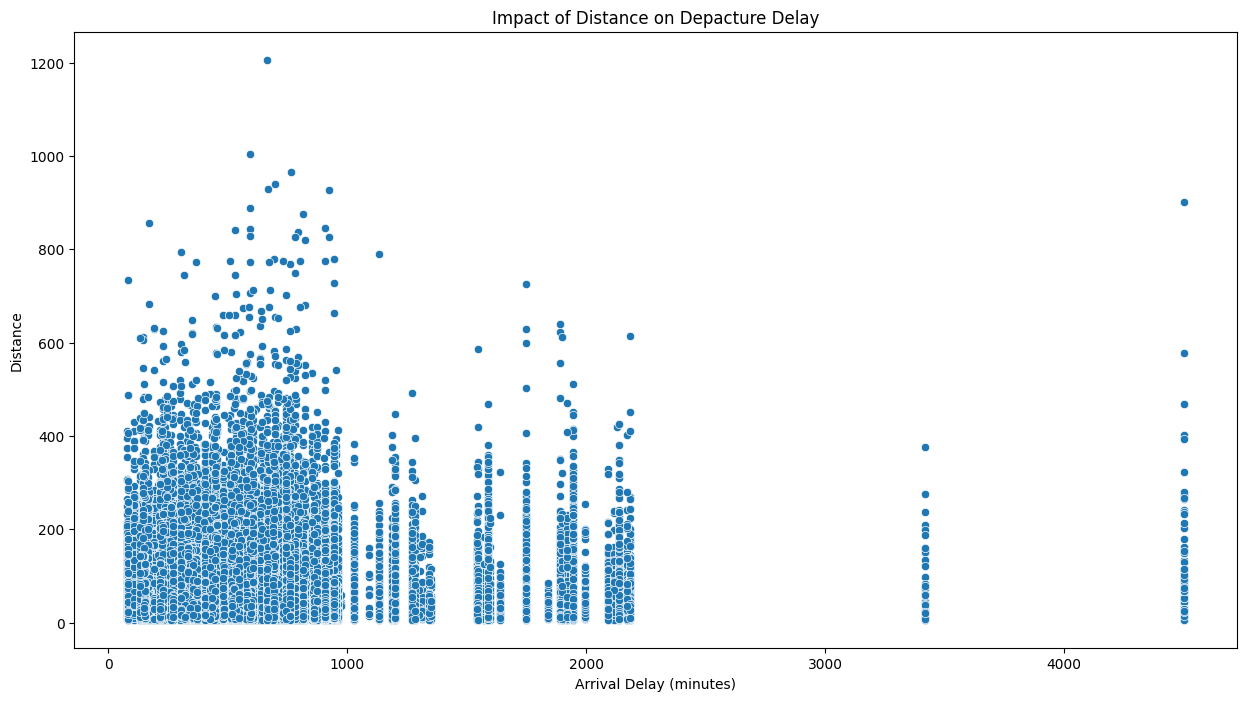

In [25]:
plt.figure(figsize=(15, 8))
sns.scatterplot(x='Distance', y='DepDelay', data=df)
plt.title('Impact of Distance on Depacture Delay')
plt.xlabel('Arrival Delay (minutes)')
plt.ylabel('Distance')
plt.show()

**Nhận xét**  
- Khoảng cách không ảnh hưởng đến delay

Biểu đồ tỷ lệ nguyên nhân gây chậm trễ

In [26]:
delay_causes = df[['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']].sum()

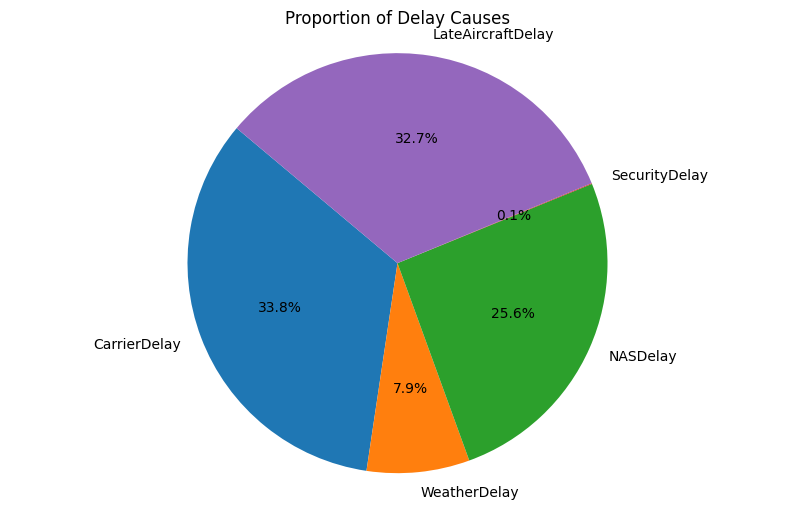

In [27]:
plt.figure(figsize=(10, 6))
plt.pie(delay_causes, labels=delay_causes.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Delay Causes')
plt.axis('equal')
plt.show()

**Nhận xét** 
- Thời gian delay do hãng hàng không gây ra chiếm tỉ lệ cao thứ nhất
- Thời gian delay do máy bay đến muộn từ chuyến trước gây ra chiếm tỉ lệ cao thứ nhì
- Thời gian delay do an ninh chiếm tỉ lệ thấp nhất

**Giải thích** 
- Có nhiều trường hợp hãng hàng không cố tình ghép các chuyến bay ít hành khách lại với nhau gây ra thời gian delay
- Delay do thời tiết có thể dẫn tới máy bay đến muộn, nên tỉ lệ delay do máy bay đến muộn cao
- Do khâu rà  soát an ninh ở sân bay khá chặt chẽ, nên tỉ lệ delay do an ninh chiếm tỉ lệ rất thấp

Phân tích xu hướng của các nguyên nhân gây chậm trễ theo thời gian dựa theo tổng thời gian gây chậm trễ

In [28]:
monthly_delays = df.groupby('Month')[['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']].sum().reset_index()

In [29]:
month=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

fig = px.line(monthly_delays, x=month, y=['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'], 
              title='Trends of Delay Causes Over Time', labels={'value': 'Total Delay (minutes)', 'variable': 'Delay Cause'})
fig.update_layout(xaxis_title='Month', yaxis_title='Total Delay (minutes)')
fig.show()

**Nhận xét** 
- Nhìn chung, các đường tương đồng với số chuyến bay bị trễ theo tháng
- Trong 6 tháng đầu năm, nguyên nhần gây delay lần lượt là  do hãng hàng không, rồi tới do máy bay đến trễ, tới hệ thống hàng không quốc gia (NAS) rồi tới thời tiết.
- Trong tháng 7, delay do máy bay đến trễ, và hệ thống hàng không quốc gia (NAS) tăng mạnh, vượt  qua nguyên nhân hãng hàng không, nhưng cũng đột ngột giảm mạnh vào tháng 8 ,9  rồi tăng trở lại trong các tháng 10, 11 , 12


Phân tích xu hướng của các nguyên nhân gây chậm trễ theo thời gian dựa theo số chuyến bay

In [30]:
monthly_delays = df.groupby('Month')[['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']].apply(lambda x: (x > 0).sum()).reset_index()
month = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']


fig = px.line(monthly_delays, x=month, y=['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'], 
              title='Trends of Delay Causes Over Time', labels={'value': 'Number of Delays', 'variable': 'Delay Cause'})
fig.update_layout(xaxis_title='Month', yaxis_title='Number of Delays')
fig.show()

**Nhận xét** 
- Nhìn chung, các đường tương đồng với số chuyến bay bị trễ theo tháng
- Trong 7 tháng đầu năm, nguyên nhần gây delay lần lượt là hệ thống hàng không quốc gia (NAS),  do hãng hàng không, rồi tới do máy bay đến trễ, tới  rồi tới thời tiết.
- Từ tháng 9, nguyên nhân do máy bay đến trẽ vượt qua nguyên nhân do hẵng hàng không.
- Ta thấy tổng số chuyến bay bị delay do Nas là lớn nhất, nhưng tổng thời gian delay lại ít hơn nguyên nhân do hãng hàng không, rồi tới do máy bay đến trễ.

Phân tích xu hướng của các nguyên nhân gây chậm trễ theo thời gian dựa theo thời gian gây chậm trễ trung bình

In [33]:
# Nhóm dữ liệu theo tháng và tính thời gian bị delay trung bình
monthly_avg_delays = df.groupby('Month')[['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']].mean().reset_index()

# Thêm tên tháng vào dataframe
monthly_avg_delays['Month'] = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Vẽ biểu đồ sử dụng plotly
fig = px.line(monthly_avg_delays, x='Month', y=['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'], 
              title='Average Delay Time by Cause per Month', 
              labels={'value': 'Average Delay (minutes)', 'variable': 'Delay Cause'},
              markers=True)
fig.update_layout(xaxis_title='Month', yaxis_title='Average Delay (minutes)')
fig.show()

**Nhận xét** 
- Biểu đồ khá tương đồng với tổng thời gian gây delay.
- Nguyên  nhân chậm trễ do hãng hàng không  có thời gian delay trung bình cao nhất trong 6 tháng đầu năm.
- Thời gian delay trung bình do NAS và do máy bay đến trể tăng nhanh bắt đầu từ tháng 5 và đạt đỉnh ở tháng 7, và bắt đầu giảm mạnh cho tới tháng 9 rồi tăng trở lại.
- Thời gian delay trung bình do thời tiêt có xu hướng khá giống với NAS, ngoại trừ các thàng cuối năm.